<a href="https://colab.research.google.com/github/yanezdavid/Classifying-Wine-Quality/blob/main/Wine_Quality_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question:**
Can we use previously rated wine as "good" or "bad" to predict the quality of untested wines?

**Contextualizing the Data:** Data recieved from [Kaggle](https://www.kaggle.com/nareshbhat/wine-quality-binary-classification). Features include the phisicochemical attributes of wine and their percieved quality as "good" or "bad" wines.

# Load Data

In [7]:
#link drive
from google.colab import drive
drive.mount('/content/drive')

#import libraries
import pandas as pd
import numpy as np

#load data
df = pd.read_csv('/content/drive/MyDrive/Data Science/Projects/wine.csv')

#preview dataset
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


# Data Cleaning

In [8]:
#search for missing values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
#confirm datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [10]:
#check the dimensions of the data
df.shape

(1599, 12)

In [11]:
#compare number of good & bad wines
df.value_counts('quality')

quality
good    855
bad     744
dtype: int64

In [12]:
#encode categorical data (quality)
df.replace({'good':0,
            'bad':1},
            inplace=True)

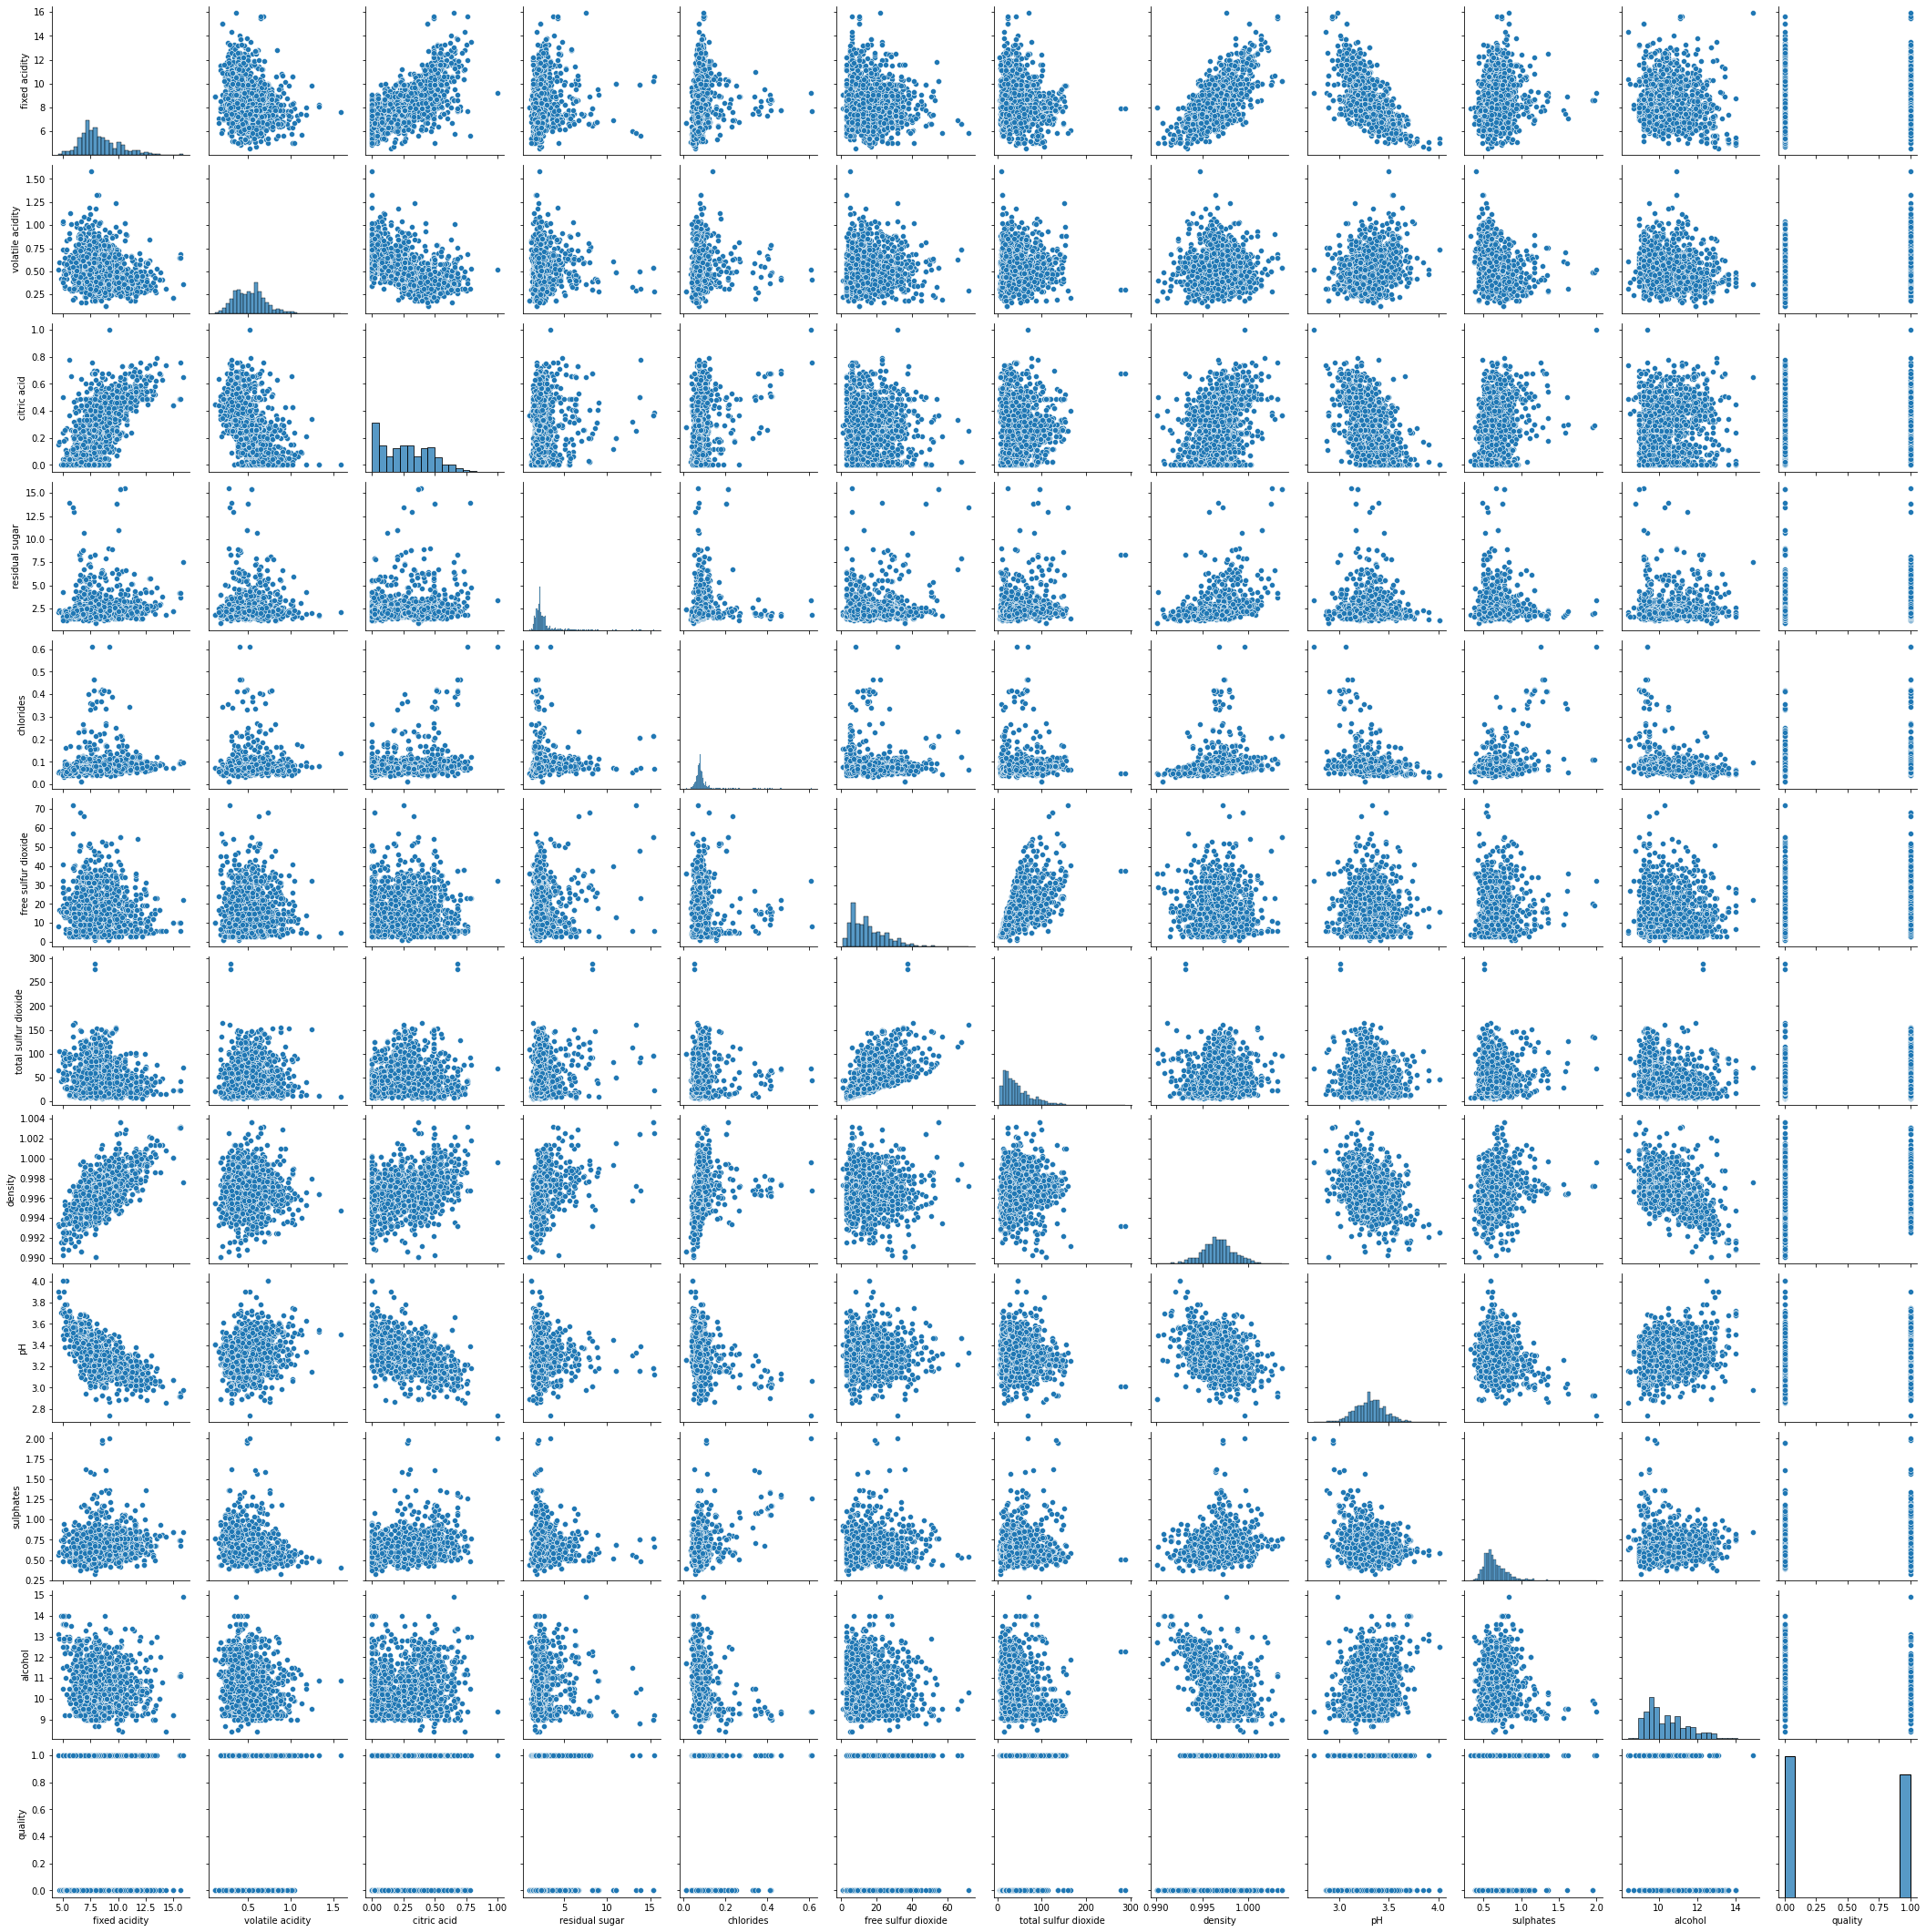

In [13]:
#visualize relationships between features & distrubution of features for normality
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df);

Data looks fairly normal and unskewed. No need to remove outliers.

# Pre-Processing for Machine Learning

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#seperate into feature matrix & target vector 
X = df.drop(columns='quality')
y = df['quality']

#seperate into testing and training sets
#stratify target feature to ensure the proportion of 'good' vs. 'bad' data is proportional 
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    test_size=.3,
                                                    stratify=y)

# Random Forest

In [15]:
#import and fit model
from sklearn.ensemble import RandomForestClassifier

rf_class = RandomForestClassifier(random_state=42)
rf_class.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [16]:
#score the default model across using accuracy, F1, and a confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
rf_class_pred = rf_class.predict(X_test)
rf_class_conf = confusion_matrix(y_test, rf_class_pred)

print('Testing Accuracy Score: '+ str(rf_class.score(X_test, y_test)))
print('-----------------------------------------------------------------------------------')
print(classification_report(y_test, rf_class_pred))
print('-----------------------------------------------------------------------------------')
print(rf_class_conf)

Testing Accuracy Score: 0.825
-----------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       257
           1       0.81      0.82      0.81       223

    accuracy                           0.82       480
   macro avg       0.82      0.82      0.82       480
weighted avg       0.83      0.82      0.83       480

-----------------------------------------------------------------------------------
[[214  43]
 [ 41 182]]


In [17]:
#use GridSearchCV to find optimal hyperparemeters to tune model
from sklearn.model_selection import GridSearchCV

rf_class_params = {'n_estimators': [20, 50, 120, 200],
                   'max_features': ['log2', 'sqrt','auto'],
                   'max_depth': [2, 5, 12, 16, 20]}

rf_class_grid_search = GridSearchCV(estimator = rf_class,
                                    param_grid = rf_class_params,
                                    cv=5,
                                    n_jobs=-1,
                                    verbose=True,
                                    scoring='accuracy')

rf_class_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   58.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [18]:
#recieve optimal hyperparameters
print(str(rf_class_grid_search.best_params_))

{'max_depth': 12, 'max_features': 'log2', 'n_estimators': 120}


In [19]:
#fit a the optimized model with the best hyperparameters
rf_class_opt = RandomForestClassifier(max_depth=12,
                                  max_features='log2',
                                  n_estimators=120,
                                  random_state=0)

rf_class_opt.fit(X_train, y_train)
rf_class_pred_opt = rf_class.predict(X_test)
rf_class_conf_opt = confusion_matrix(y_test, rf_class_pred_opt)

#score and compared the new model to the default
print('Testing Accuracy Score: ' + str(rf_class_opt.score(X_test, y_test)))
print('-----------------------------------------------------------------------------------')
print(classification_report(y_test, rf_class_pred_opt))
print('-----------------------------------------------------------------------------------')
print(rf_class_conf_opt)

Testing Accuracy Score: 0.8354166666666667
-----------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       257
           1       0.81      0.82      0.81       223

    accuracy                           0.82       480
   macro avg       0.82      0.82      0.82       480
weighted avg       0.83      0.82      0.83       480

-----------------------------------------------------------------------------------
[[214  43]
 [ 41 182]]


GridSearchCV has improved the overall accuracy score by  about 1%.

# Logistic Regression

Logistic regression assumes there is not multicollinearity in the data, or relationships between features. Let's create a correlegram to see if we can meet this assumption.

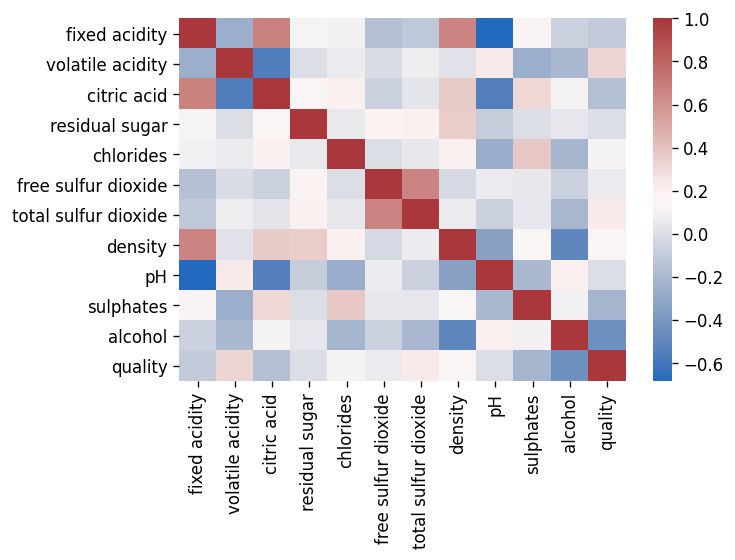

In [20]:
#visualize correlations between features to check for multicollinearity
plt.rcParams['figure.dpi'] = 120

df_corr = df.corr()
sns.heatmap(df_corr,
            annot=False,
            cmap='vlag');

The relationships between features seem mostly weak. However, there are some strong relationships. We will still conduct Logistic Regression, but while note that this model may underperform due to multicollinearity.

Logistic Regression performs better overall with scaled data.

In [21]:
#import Scaler and scale the data for improved performance
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [22]:
#import and fit model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_sc, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
#score the default model
log_reg_pred = log_reg.predict(X_test_sc)
log_reg_conf = confusion_matrix(y_test, log_reg_pred)

print('Testing Accuracy Score: '+ str(log_reg.score(X_test_sc, y_test)))
print('-----------------------------------------------------------------------------------')
print(str(classification_report(y_test, log_reg_pred)))
print('-----------------------------------------------------------------------------------')
print(str(log_reg_conf))

Testing Accuracy Score: 0.7708333333333334
-----------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       257
           1       0.75      0.76      0.75       223

    accuracy                           0.77       480
   macro avg       0.77      0.77      0.77       480
weighted avg       0.77      0.77      0.77       480

-----------------------------------------------------------------------------------
[[201  56]
 [ 54 169]]


In [24]:
#Use GridSearchCV to find optimal hyperparameters for tuning the default model
log_reg_params = {
    'C': [0.001, 0.01, 0.1, 1],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [100, 1000,2500, 5000]}

log_reg_grid_search = GridSearchCV(estimator=log_reg,
             param_grid=log_reg_params,
             cv=5,
             verbose=True,
             n_jobs=-1)

log_reg_grid_search.fit(X_train_sc, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 429 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    2.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [25]:
#recieve optimal hyperparameters
log_reg_grid_search.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [26]:
#fit and score new model with optimal hyperparameters
log_reg_opt = LogisticRegression(C=1,
                                 penalty='l2',
                                 solver='newton-cg',
                                 max_iter=100)

log_reg_opt.fit(X_train_sc, y_train)
log_reg_pred_opt = log_reg_opt.predict(X_test_sc)
log_reg_conf_opt = confusion_matrix(y_test, log_reg_pred_opt)

print('Testing Accuracy Score: '+ str(log_reg_opt.score(X_test_sc, y_test)))
print('-----------------------------------------------------------------------------------')
print(str(classification_report(y_test, log_reg_pred_opt)))
print('-----------------------------------------------------------------------------------')
print(str(log_reg_conf_opt))

Testing Accuracy Score: 0.7708333333333334
-----------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       257
           1       0.75      0.76      0.75       223

    accuracy                           0.77       480
   macro avg       0.77      0.77      0.77       480
weighted avg       0.77      0.77      0.77       480

-----------------------------------------------------------------------------------
[[201  56]
 [ 54 169]]


Tuning this model seems to have a marginal effect on the accuracy of the default hyperparameters. There is no signifant difference between the default and tuned hyperparameters.

# KNN

In [27]:
#import KNN and fit default model
from sklearn.neighbors import KNeighborsClassifier

#like Logistic Regression, KNN typically performs better with scaled data
knn = KNeighborsClassifier()
knn.fit(X_train_sc, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [28]:
#score the default model
knn_pred = knn.predict(X_test_sc)
knn_conf = confusion_matrix(y_test, knn_pred)

print('Testing Accuracy Score: '+ str(knn.score(X_test_sc, y_test)))
print('-----------------------------------------------------------------------------------')
print(classification_report(y_test, knn_pred))
print('-----------------------------------------------------------------------------------')
print(knn_conf)

Testing Accuracy Score: 0.7583333333333333
-----------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       257
           1       0.76      0.70      0.73       223

    accuracy                           0.76       480
   macro avg       0.76      0.75      0.76       480
weighted avg       0.76      0.76      0.76       480

-----------------------------------------------------------------------------------
[[209  48]
 [ 68 155]]


In [29]:
#use GridSearchCV to find optimal hyperparameters for tuning
knn_params = {'n_neighbors' : list(range(1,300, 20)),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

knn_grid_search = GridSearchCV(estimator=knn,
             param_grid=knn_params,
             cv=5,
             n_jobs=-1,
             verbose=True)

knn_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    5.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                         181, 201, 221, 241, 261, 281],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [30]:
#recieve optimal hyperparameters
knn_grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 61, 'weights': 'distance'}

In [31]:
#fit optimized model with the best hyperparameters
knn_opt = KNeighborsClassifier(metric='manhattan',
                               weights='distance',
                               n_neighbors=61)

knn_opt.fit(X_train_sc, y_train)
knn_pred_opt = knn_opt.predict(X_test_sc)
knn_conf_opt = confusion_matrix(y_test, knn_pred_opt)

#score and compared the new model to the default
print('Testing Accuracy Score: ' + str(knn_opt.score(X_test_sc, y_test)))
print('-----------------------------------------------------------------------------------')
print(classification_report(y_test, knn_pred_opt))
print('-----------------------------------------------------------------------------------')
print(knn_conf_opt)

Testing Accuracy Score: 0.8125
-----------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       257
           1       0.82      0.77      0.79       223

    accuracy                           0.81       480
   macro avg       0.81      0.81      0.81       480
weighted avg       0.81      0.81      0.81       480

-----------------------------------------------------------------------------------
[[219  38]
 [ 52 171]]


Hyperparameter tuning has increased overall accuracy of the model by about 5%.

# XGBoost

In [32]:
#import and fit model with default hyperparameters
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [33]:
#score default model
xgb_pred = xgb.predict(X_test)
xgb_conf = confusion_matrix(y_test, xgb_pred)

print('Testing Accuracy Score: ' + str(xgb.score(X_test, y_test)))
print('-----------------------------------------------------------------------------------')
print(classification_report(y_test, xgb_pred))
print('-----------------------------------------------------------------------------------')
print(xgb_conf)

Testing Accuracy Score: 0.8020833333333334
-----------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       257
           1       0.79      0.79      0.79       223

    accuracy                           0.80       480
   macro avg       0.80      0.80      0.80       480
weighted avg       0.80      0.80      0.80       480

-----------------------------------------------------------------------------------
[[209  48]
 [ 47 176]]


In [34]:
#run a GridSearchCV to find optimal hyperparameters for tuning
xgb_params = {'eta': [.001, .004, .008,],
              'booster': ['gbtree'],
              'min_child_rate': [.01, .1, .5, 2, 3],
              'n_estimators': list(range(25, 300, 25)),
              'max_depth': [1,2,3,5,7]
}

xgb_grid_search = GridSearchCV(estimator=xgb,
             param_grid=xgb_params,
             cv=5,
             verbose=True,
             n_jobs=-1)

xgb_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 825 candidates, totalling 4125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done 1104 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1512 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2412 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 3670 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 4125 out of 4125 | elapsed:  6.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'booster': ['gbtree'], 'eta': [0.001, 0.004, 0.008],
                         'max_depth': [1, 2, 3, 5, 7],
                         'min_child_rate': [0

In [35]:
#recieve optimal hyperparameters
xgb_grid_search.best_params_

{'booster': 'gbtree',
 'eta': 0.001,
 'max_depth': 5,
 'min_child_rate': 0.01,
 'n_estimators': 250}

In [36]:
#fit and score new model with optimal hyperparameters
xgb_opt = XGBClassifier(booster='gbtree',
                        eta=.001,
                        min_child_rate=.01,
                        n_estimators=250,
                        eval_metric='error',
                        random_state=42)

xgb_opt.fit(X_train, y_train)
xgb_pred_opt = xgb_opt.predict(X_test)
xgb_conf_opt = confusion_matrix(y_test, xgb_pred_opt)

print('Testing Accuracy Score: '+ str(xgb_opt.score(X_test, y_test)))
print('-----------------------------------------------------------------------------------')
print(classification_report(y_test, xgb_pred_opt))
print('-----------------------------------------------------------------------------------')
print(xgb_conf_opt)

Testing Accuracy Score: 0.8
-----------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       257
           1       0.78      0.79      0.79       223

    accuracy                           0.80       480
   macro avg       0.80      0.80      0.80       480
weighted avg       0.80      0.80      0.80       480

-----------------------------------------------------------------------------------
[[207  50]
 [ 46 177]]


The default XGBoost Classifier is more accurate than the tuned model. We will rely on the default model for predictions.

# Ensemble

In [37]:
#import ensemble model to combine classifiers into one model
from sklearn.ensemble import VotingClassifier

ensemble_classifier = VotingClassifier(estimators = [('rf', rf_class_opt),
                                                     ('log_reg', log_reg_opt),
                                                     ('knn', knn_opt),
                                                     ('xgb', xgb)],
                                                      voting='soft')
#fit model
ensemble_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=12,
                                                     max_features='log2',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
          

In [38]:
#score ensemble model
ensemble_classifier_pred = xgb_opt.predict(X_test)
ensemble_classifier_conf = confusion_matrix(y_test, ensemble_classifier_pred)

print('Testing Accuracy Score: '+ str(ensemble_classifier.score(X_test, y_test)))
print('-----------------------------------------------------------------------------------')
print(classification_report(y_test, ensemble_classifier_pred))
print('-----------------------------------------------------------------------------------')
print(ensemble_classifier_conf)

Testing Accuracy Score: 0.825
-----------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       257
           1       0.78      0.79      0.79       223

    accuracy                           0.80       480
   macro avg       0.80      0.80      0.80       480
weighted avg       0.80      0.80      0.80       480

-----------------------------------------------------------------------------------
[[207  50]
 [ 46 177]]


# Comparing Models & Predictions

What is the best model to predict wine quality?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


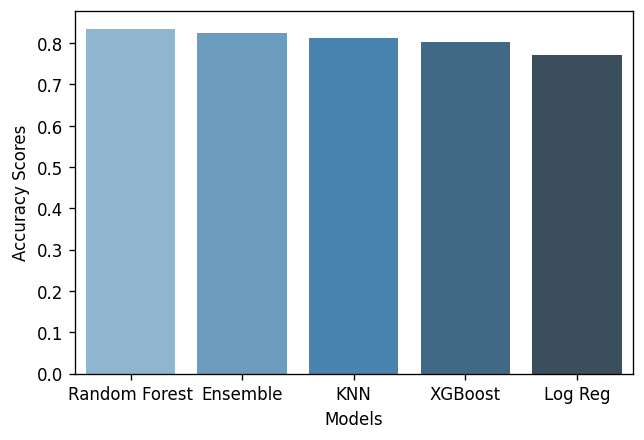

In [39]:
#visualize accuracy scores
accuracy_scores = [['Random Forest', rf_class_opt.score(X_test, y_test)],
                   ['Log Reg', log_reg_opt.score(X_test_sc, y_test)],
                   ['KNN', knn_opt.score(X_test_sc, y_test)],
                   ['XGBoost', xgb.score(X_test, y_test)],
                   ['Ensemble', ensemble_classifier.score(X_test, y_test)]]

scores = pd.DataFrame(accuracy_scores, columns = ['Models', 'Accuracy Scores']);

sns.barplot(scores['Models'],
            scores['Accuracy Scores'],
            palette='Blues_d',
            order=['Random Forest', 'Ensemble', 'KNN', 'XGBoost', 'Log Reg']);

In [43]:
#make predictions with Random Forest, the most accurate model
predicted_quality = pd.DataFrame({ 'quality': rf_class_pred_opt})